# <center>Overview of an exoplanet external database</center>

**Our aim is to find some planets having a rich rv data to apply ICA onto.** 
  
In this notebook we have a first look to the following database: https://exoplanetarchive.ipac.caltech.edu/bulk_data_download/MARVELS_RV_bulk_download.tar.gz  
For more details see:  
https://exoplanetarchive.ipac.caltech.edu/docs/contributed_data.html

In [1]:
# Before anything, import relevant modules
%load_ext autoreload
%autoreload 2

import autograd.numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [17]:
np.shape(files)

(6320,)

In [3]:
files = os.listdir('../data/other_data/MARVELS_RV_bulk_download')

In [4]:
files

['47UMA_001_RV.tbl',
 '47UMA_002_RV.tbl',
 '47UMA_003_RV.tbl',
 '47UMA_004_RV.tbl',
 '47UMA_005_RV.tbl',
 '47UMA_006_RV.tbl',
 '47UMA_007_RV.tbl',
 '47UMA_008_RV.tbl',
 '47UMA_009_RV.tbl',
 '47UMA_010_RV.tbl',
 '47UMA_011_RV.tbl',
 '47UMA_012_RV.tbl',
 '47UMA_013_RV.tbl',
 '47UMA_014_RV.tbl',
 '47UMA_015_RV.tbl',
 '47UMA_016_RV.tbl',
 '47UMA_017_RV.tbl',
 '47UMA_018_RV.tbl',
 '47UMA_019_RV.tbl',
 '47UMA_020_RV.tbl',
 '47UMA_021_RV.tbl',
 '47UMA_022_RV.tbl',
 '47UMA_023_RV.tbl',
 '47UMA_024_RV.tbl',
 '47UMA_025_RV.tbl',
 '47UMA_026_RV.tbl',
 '47UMA_027_RV.tbl',
 '47UMA_028_RV.tbl',
 '47UMA_029_RV.tbl',
 '47UMA_030_RV.tbl',
 '47UMA_031_RV.tbl',
 '47UMA_032_RV.tbl',
 '47UMA_033_RV.tbl',
 '47UMA_034_RV.tbl',
 '47UMA_035_RV.tbl',
 '47UMA_036_RV.tbl',
 '47UMA_037_RV.tbl',
 '47UMA_038_RV.tbl',
 '47UMA_039_RV.tbl',
 '47UMA_040_RV.tbl',
 '47UMA_041_RV.tbl',
 '47UMA_042_RV.tbl',
 '47UMA_043_RV.tbl',
 '47UMA_044_RV.tbl',
 '47UMA_046_RV.tbl',
 '47UMA_047_RV.tbl',
 '47UMA_048_RV.tbl',
 '47UMA_049_R

In [6]:
def get_meta_data(name):
    meta = pd.read_table('../data/other_data/MARVELS_RV_bulk_download/'+name, 
                         nrows=18, 
                         sep='\s+', 
                         skipinitialspace=True, 
                         header=None).drop(columns=[1]).T
    meta.columns = meta.iloc[0]
    meta.drop(meta.index[0], inplace=True)
    meta.insert(loc=0, column='\\FILE_NAME', value=name)
    meta.reset_index(drop=True, inplace=True)
    return meta

In [59]:
A=get_meta_data(files[0])

np.shape(A)
A

,\FILE_NAME,\STAR_ID,\DATA_CATEGORY,\NUMBER_OF_POINTS,\TIME_REFERENCE_FRAME,\MINIMUM_DATE,\DATE_UNITS,\MAXIMUM_DATE,\MINIMUM_VALUE,\VALUE_UNITS,\MAXIMUM_VALUE,\REFERENCE,\BIBCODE,\TELESCOPE,\INSTRUMENT,\WAVELENGTH_CALIBRATION_TECHNIQUE,\OBSERVATORY_SITE,\COLUMN_FCJD,\COLUMN_RADIAL_VELOCITY
0,47UMA_001_RV.tbl,2MASS J10564574+3948430,Planet Radial Velocity Curve,28,FCJD,2454927.821296,days,2455557.971782,-135.626,m/s,104.154,"Thomas et al. 2016 (PASP, 128, 5003)",2016PASP..128d5003T,2.5m Sloan Foundation Telescope,MARVELS,Tungsten Iodine Lamp,"Apache Point Observatory, New Mexico",Flux Centered Julian Date of observation,Radial velocity relative to barycenter


In [21]:
try:
    print('Importing metadata...')
    meta = pd.read_csv('../data/other_data/MARVELS_metadata.csv')
except:
    print('Building metadata...')
    meta = pd.DataFrame()
    for name in files:
        try:
            meta = pd.concat([meta, get_meta_data(name)], ignore_index=True)
        except Exception as error:
            print('Error:', error, ' with file:', name)
    meta.to_csv('../data/other_data/MARVELS_metadata.csv', index=False)

Importing metadata...


First trying to catch some data on exoplanet **HD 189733 b**, orbiting and transiting acrross the stars in **2MASS J200043.70+224239.1**

In [22]:
target = '2MASS J200043.70+224239.1'

for star in pd.unique(meta['\STAR_ID']):
    if target[:11] in star:
        print(star)

2MASS J20002213+4350407
2MASS J20003789+4439288
2MASS J20002874+4436235
2MASS J20005939+4442514


>**NOTE**: It seems that we have no data for HD189 in this database...

Let's investigate some other stars:

In [49]:
def get_data(name):
    data = pd.read_table('../data/other_data/MARVELS_RV_bulk_download/'+name, 
                         skiprows=22, 
                         sep='\s+', 
                         skipinitialspace=True,
                         names=['FCJD', 'Radial_Velocity', 'Radial_Velocity_Uncertainty'])
    return data

In [53]:
get_data(files[0])

,FCJD,Radial_Velocity,Radial_Velocity_Uncertainty
0,2.454928e+06,18.445,34.918
1,2.454929e+06,-22.415,28.818
2,2.454965e+06,-3.824,33.590
3,2.454966e+06,-13.471,39.439
4,2.454995e+06,26.773,43.495
5,2.455194e+06,35.790,26.907
6,2.455198e+06,104.154,26.957
7,2.455199e+06,85.207,36.185
8,2.455200e+06,NaN,NaN
9,2.455201e+06,NaN,NaN


In [54]:
def plot_rvs(star_id):
    files = meta[meta['\\STAR_ID']==star_id]['\\FILE_NAME']
    data = list(map(get_data, files))
    fig = plt.figure()
    plt.grid(True)
    for obs, file in zip(data, files):
        plt.errorbar(obs['FCJD'], 
                     obs['Radial_Velocity'], 
                     obs['Radial_Velocity_Uncertainty'], 
                     fmt='x',
                     label=file)
    plt.legend()
    return fig

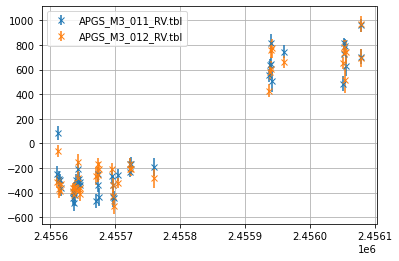

In [55]:
# The star with the biggest rv points : 42
star = '2MASS J13444175+2627521'
fig = plot_rvs(star)

2MASS J19351127+4904063


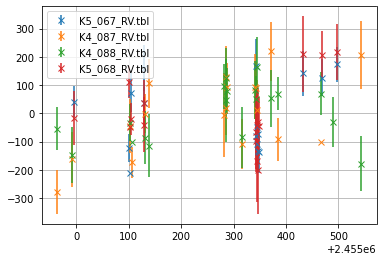

2MASS J18542062+4613392


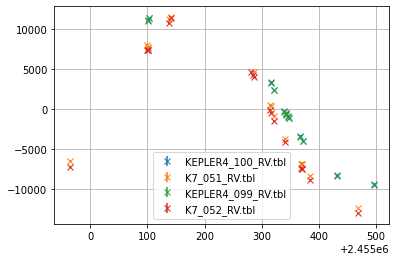

2MASS J19401103+4445333


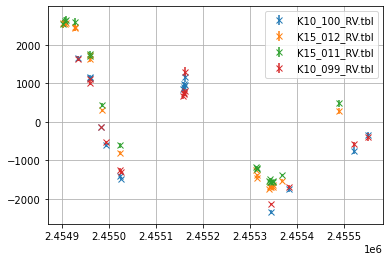

2MASS J19505791+4419294


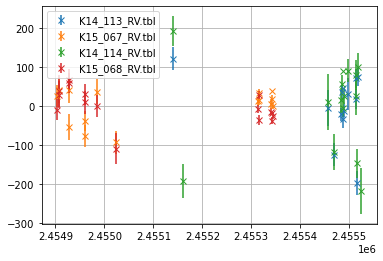

2MASS J19512614+4419508


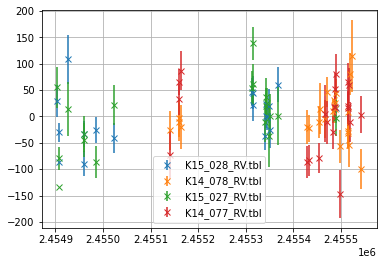

2MASS J19392310+4442016


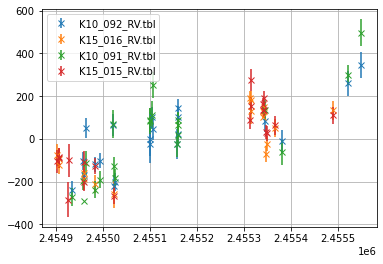

2MASS J19344940+4918367


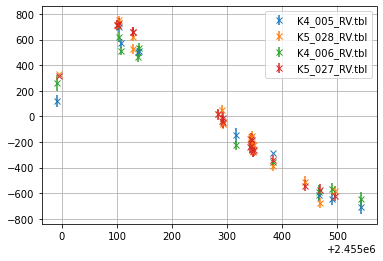

In [9]:
for star_id in pd.unique(meta['\\STAR_ID']):
    if len(meta[meta['\\STAR_ID']==star_id]['\\FILE_NAME'])>3:
        print(star_id)
        fig = plot_rvs(star_id)
        plt.show()

# <center>To be continued...